# Welcome to the 'First steps with pandas'!

After this workshop you can (hopefully) call yourselves Data Scientists!

### Before coding, let's check whether we have proper versions of libraries

In [1]:
import platform
print('Python: ' + platform.python_version())

import numpy as np
print('numpy: ' + np.__version__)

import pandas as pd
print('pandas: ' + pd.__version__)

import scipy
print('scipy: ' + scipy.__version__)

import sklearn
print('scikit-learn: ' + sklearn.__version__)

import matplotlib as plt
print('matplotlib: ' + plt.__version__)

import flask
print('flask: ' + flask.__version__)

Python: 2.7.10
numpy: 1.11.1
pandas: 0.18.1
scipy: 0.18.1
scikit-learn: 0.17.1
matplotlib: 1.5.2
flask: 0.11.1


## What is pandas?

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Why to use it?

### It has ready solutions for most of data-related tasks
- rapid development
- code readability
- fewer mistakes/bugs

In [2]:
# In case of no Internet, use:
# pd.read_json('data/cached_Python.json') \

pd.read_json('http://stats.grok.se/json/en/201601/Python_(programming_language)') \
    .resample('1W') \
    .mean()['daily_views']

2016-01-03    2767.666667
2016-01-10    4626.571429
2016-01-17    4871.857143
2016-01-24    5249.333333
Freq: W-SUN, Name: daily_views, dtype: float64

### It is reasonably fast

In [3]:
some_data = [ list(range(1,100)) for x in range(1,1000) ]
some_df = pd.DataFrame(some_data)

def standard_way(data):
    return [[x*2 for x in row] for row in data]


def pandas_way(df):
    return df * 2

In [4]:
%timeit standard_way(some_data)

100 loops, best of 3: 10.7 ms per loop


In [5]:
%timeit pandas_way(some_df)

The slowest run took 7.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 232 µs per loop


### It deals nicely with real data problems (e.g. missing data)

In [6]:
missing_data = pd.DataFrame([
    dict(name="Jacek", height=174),
    dict(name="Mateusz", weight=81),
    dict(name="Lionel Messi", height=169, weight=67)
])
missing_data

,height,name,weight
0,174.0,Jacek,NaN
1,NaN,Mateusz,81.0
2,169.0,Lionel Messi,67.0


In [7]:
missing_data.fillna(missing_data.mean())

,height,name,weight
0,174.0,Jacek,74.0
1,171.5,Mateusz,81.0
2,169.0,Lionel Messi,67.0


### It has a very cool name.

![caption](files/pandas.jpg)

> https://c1.staticflickr.com/5/4058/4466498508_35a8172ac1_b.jpg

###  Library highlights

http://pandas.pydata.org/#library-highlights<br/>
http://pandas.pydata.org/pandas-docs/stable/api.html

## Data structures

### Series

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [8]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

0    400
1    200
2    300
3    400
4    500
dtype: int64

In [9]:
names = pd.Series(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"])
names

0        Batman
1         Robin
2     Spiderman
3       Robocop
4    Terminator
dtype: object

### DataFrame

> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

#### Creating

In [10]:
heroes = pd.DataFrame({
    'hero': names,
    'strength': strengths
})
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [11]:
other_heroes = pd.DataFrame([
    dict(hero="Hercules", strength=800),
    dict(hero="Konan")
])
other_heroes

,hero,strength
0,Hercules,800.0
1,Konan,NaN


In [12]:
another_heroes = pd.DataFrame([
    pd.Series(["Bolek", 10, 3], index=["hero", "strength", "cookies"]),
    pd.Series(["Lolek", 20, 0], index=["hero", "strength", "cookies"])
])
another_heroes

,hero,strength,cookies
0,Bolek,10,3
1,Lolek,20,0


#### Meta data

In [13]:
another_heroes.columns

Index([u'hero', u'strength', u'cookies'], dtype='object')

In [14]:
another_heroes.shape

(2, 3)

In [15]:
another_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
hero        2 non-null object
strength    2 non-null int64
cookies     2 non-null int64
dtypes: int64(2), object(1)
memory usage: 120.0+ bytes


#### Selecting
```[string] --> Series
[ list of strings ] --> DataFrame```

In [16]:
another_heroes['cookies']

0    3
1    0
Name: cookies, dtype: int64

In [17]:
another_heroes.cookies

0    3
1    0
Name: cookies, dtype: int64

In [18]:
another_heroes[ ['hero', 'cookies'] ]

,hero,cookies
0,Bolek,3
1,Lolek,0


#### Chaining (most of operations on DataFrame returns new DataFrame or Series)

In [19]:
another_heroes[['hero', 'cookies']][['cookies']]

,cookies
0,3
1,0


In [20]:
another_heroes[['hero', 'cookies']][['cookies']]['cookies']

0    3
1    0
Name: cookies, dtype: int64

### EXERCISE

Create DataFrame presented below in 3 different ways
```
                                         movie_title  imdb_score
0                                            Avatar          7.9
1          Pirates of the Caribbean: At World's End          7.1
2                                           Spectre          6.8
```

Help: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#from-dict-of-series-or-dicts

#### With dict of Series

In [21]:
# Solution here

titles = pd.Series(["Avatar", "Pirates of the Caribbean: At World's End", "Spectre"])
imdb_scores = pd.Series([7.9, 7.1, 6.8])

pd.DataFrame({'movie_title': titles, 'imdb_score': imdb_scores})

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


#### With list of dicts

In [22]:
# Solution here

pd.DataFrame([
    dict(movie_title="Avatar", imdb_score=7.9),
    dict(movie_title="Pirates of the Caribbean: At World's End", imdb_score=7.1),
    dict(movie_title="Spectre", imdb_score=6.8),
])

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


#### With list of Series

In [23]:
# Solution here

pd.DataFrame([
    pd.Series(["Avatar", 7.9], index=['movie_title', 'imdb_score']),
    pd.Series(["Pirates of the Caribbean: At World's End", 7.1], index=['movie_title', 'imdb_score']),
    pd.Series(["Spectre", 6.8], index=['movie_title', 'imdb_score'])
])

,movie_title,imdb_score
0,Avatar,7.9
1,Pirates of the Caribbean: At World's End,7.1
2,Spectre,6.8


## I/O part I

### Reading popular formats / data sources

In [24]:
# Uncomment and press tab..
# pd.read_
# SQL, csv, hdf

In [25]:
# pd.read_csv?

In [26]:
# executing bash in jupyter notebook
!head data/cached_python.json

{"daily_views":{"1451606400000":2701,"1451692800000":2829,"1451779200000":2773,"1451865600000":5072,"1451952000000":5513,"1452038400000":5233,"1452124800000":5518,"1452211200000":5312,"1452297600000":2749,"1452384000000":2989,"1452470400000":5539,"1452556800000":6161,"1452643200000":6175,"1452729600000":5545,"1452816000000":4833,"1452902400000":2858,"1452988800000":2992,"1453075200000":4673,"1453161600000":5625,"1453248000000":5450},"month":{"1451606400000":201601,"1451692800000":201601,"1451779200000":201601,"1451865600000":201601,"1451952000000":201601,"1452038400000":201601,"1452124800000":201601,"1452211200000":201601,"1452297600000":201601,"1452384000000":201601,"1452470400000":201601,"1452556800000":201601,"1452643200000":201601,"1452729600000":201601,"1452816000000":201601,"1452902400000":201601,"1452988800000":201601,"1453075200000":201601,"1453161600000":201601,"1453248000000":201601},"project":{"1451606400000":"en","1451692800000":"en","1451779200000":"en","1451865600000":"en

In [27]:
pd.read_json('data/cached_python.json')

,daily_views,month,project,rank,title
2016-01-01,2701,201601,en,2251,Python_(programming_language)
2016-01-02,2829,201601,en,2251,Python_(programming_language)
2016-01-03,2773,201601,en,2251,Python_(programming_language)
2016-01-04,5072,201601,en,2251,Python_(programming_language)
2016-01-05,5513,201601,en,2251,Python_(programming_language)
2016-01-06,5233,201601,en,2251,Python_(programming_language)
2016-01-07,5518,201601,en,2251,Python_(programming_language)
2016-01-08,5312,201601,en,2251,Python_(programming_language)
2016-01-09,2749,201601,en,2251,Python_(programming_language)
2016-01-10,2989,201601,en,2251,Python_(programming_language)


### EXERCISE

#### Load movies from data/movies.csv to variable called `movies`

In [28]:
# Solution here

movies = pd.read_csv('data/movies.csv')
movies.head()

,movie_title,title_year,budget,gross,genres,language,country,movie_facebook_likes,imdb_score,num_voted_users,...,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,color,duration,plot_keywords,content_rating,aspect_ratio,facenumber_in_poster,movie_imdb_link
0,Avatar,2009.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,33000,7.9,886204,...,Wes Studi,855.0,4834,Color,178.0,avatar|future|marine|native|paraplegic,PG-13,1.78,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,300000000.0,309404152.0,Action|Adventure|Fantasy,English,USA,0,7.1,471220,...,Jack Davenport,1000.0,48350,Color,169.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,245000000.0,200074175.0,Action|Adventure|Thriller,English,UK,85000,6.8,275868,...,Stephanie Sigman,161.0,11700,Color,148.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,250000000.0,448130642.0,Action|Thriller,English,USA,164000,8.5,1144337,...,Joseph Gordon-Levitt,23000.0,106759,Color,164.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,Documentary,NaN,NaN,0,7.1,8,...,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...


####  Analyze what dimensions and columns it has

In [29]:
# Solution here

print(movies.shape)
print(movies.columns)

(5043, 28)
Index([u'movie_title', u'title_year', u'budget', u'gross', u'genres',
       u'language', u'country', u'movie_facebook_likes', u'imdb_score',
       u'num_voted_users', u'num_critic_for_reviews', u'num_user_for_reviews',
       u'director_name', u'director_facebook_likes', u'actor_1_name',
       u'actor_1_facebook_likes', u'actor_2_name', u'actor_2_facebook_likes',
       u'actor_3_name', u'actor_3_facebook_likes',
       u'cast_total_facebook_likes', u'color', u'duration', u'plot_keywords',
       u'content_rating', u'aspect_ratio', u'facenumber_in_poster',
       u'movie_imdb_link'],
      dtype='object')


## Filtering

In [30]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


### Boolean indexing

In [31]:
heroes['strength'] == 400

0     True
1    False
2    False
3     True
4    False
Name: strength, dtype: bool

In [32]:
heroes[heroes['strength'] == 400]

,hero,strength
0,Batman,400
3,Robocop,400


In [33]:
heroes[heroes['strength'] > 400]

,hero,strength
4,Terminator,500


### Multiple conditions

In [34]:
try:
    heroes[200 < heroes['strength'] < 400]
except ValueError:
    print "This cool Python syntax ain't work :("

This cool Python syntax ain't work :(


In [35]:
heroes[
    (heroes['strength'] > 200) & 
    (heroes['strength'] < 400)
]

,hero,strength
2,Spiderman,300


In [36]:
heroes[
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
]

,hero,strength
0,Batman,400
1,Robin,200
3,Robocop,400
4,Terminator,500


### Negation

`~` is a negation operator

In [37]:
~(heroes['strength'] == 400)

0    False
1     True
2     True
3    False
4     True
Name: strength, dtype: bool

In [38]:
heroes['strength'] != 400

0    False
1     True
2     True
3    False
4     True
Name: strength, dtype: bool

In [39]:
heroes[~(
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
)]

,hero,strength
2,Spiderman,300


### Filtering for cointaining one of many values (SQL's IN)

In [40]:
heroes[
    heroes['hero'].isin(['Batman', 'Robin'])
]

,hero,strength
0,Batman,400
1,Robin,200


### EXERCISE

#### What movies has been directed by Clint Eastwood?

In [41]:
# Solution here

movies[movies['director_name'] == "Clint Eastwood"]

,movie_title,title_year,budget,gross,genres,language,country,movie_facebook_likes,imdb_score,num_voted_users,...,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,color,duration,plot_keywords,content_rating,aspect_ratio,facenumber_in_poster,movie_imdb_link
664,Space Cowboys,2000.0,65000000.0,90454043.0,Action|Adventure|Thriller,English,USA,0,6.4,60165,...,William Devane,416.0,17771,Black and White,130.0,nasa|old age|satellite|space|space shuttle,PG-13,2.35,1.0,http://www.imdb.com/title/tt0186566/?ref_=fn_t...
772,Invictus,2009.0,60000000.0,37479778.0,Biography|Drama|History|Sport,English,USA,23000,7.4,124222,...,Leleti Khumalo,204.0,24458,Color,134.0,apartheid|nation|nelson mandela|president|rugby,PG-13,2.35,1.0,http://www.imdb.com/title/tt1057500/?ref_=fn_t...
814,American Sniper,2014.0,58800000.0,350123553.0,Action|Biography|Drama|History|Thriller|War,English,USA,112000,7.3,325264,...,Keir O'Donnell,318.0,16277,Color,133.0,assassin|death of child|iraq|sniper|sniper rifle,R,2.35,0.0,http://www.imdb.com/title/tt2179136/?ref_=fn_t...
877,Changeling,2008.0,55000000.0,35707327.0,Crime|Drama|Mystery|Thriller,English,USA,14000,7.8,199056,...,Colm Feore,539.0,12840,Color,141.0,execution by hanging|los angeles police depart...,R,2.35,0.0,http://www.imdb.com/title/tt0824747/?ref_=fn_t...
906,Flags of Our Fathers,2006.0,90000000.0,33574332.0,Drama|History|War,English,USA,0,7.1,101221,...,Tom McCarthy,310.0,24468,Color,135.0,imperial japan|japan|japanese army|japanese so...,R,2.35,0.0,http://www.imdb.com/title/tt0418689/?ref_=fn_t...
973,Absolute Power,1997.0,50000000.0,50007168.0,Action|Crime|Drama|Thriller,English,USA,1000,6.7,39529,...,Scott Glenn,826.0,19139,Color,121.0,death|death of wife|murder|thief|violence,R,2.35,0.0,http://www.imdb.com/title/tt0118548/?ref_=fn_t...
997,Hereafter,2010.0,50000000.0,32741596.0,Drama|Fantasy,English,USA,16000,6.5,80140,...,Cécile De France,447.0,14344,Color,129.0,death|france|near death experience|tsunami|twi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt1212419/?ref_=fn_t...
1004,Blood Work,2002.0,50000000.0,26199517.0,Action|Crime|Drama|Mystery|Thriller,English,USA,705,6.4,34356,...,Rick Hoffman,581.0,18635,Color,110.0,boat|heart transplant|murder|serial killer|sister,R,2.35,1.0,http://www.imdb.com/title/tt0309377/?ref_=fn_t...
1245,Jersey Boys,2014.0,40000000.0,47034272.0,Biography|Drama|Music|Musical,English,USA,16000,6.9,25465,...,Scott Vance,235.0,2281,Color,134.0,band|music group|musical quartet|singer|song,R,2.35,1.0,http://www.imdb.com/title/tt1742044/?ref_=fn_t...
1453,J. Edgar,2011.0,35000000.0,37304950.0,Biography|Crime|Drama,English,USA,16000,6.6,102728,...,Kaitlyn Dever,363.0,36258,Color,137.0,agent|fbi|federal bureau of investigation|gay ...,R,2.35,0.0,http://www.imdb.com/title/tt1616195/?ref_=fn_t...


#### What movies have earned above $500m?

In [42]:
# Solution here

movies[movies['gross'] > 500e6]['movie_title']

0               Avatar
17        The Avengers
26             Titanic
29      Jurassic World
66     The Dark Knight
794       The Avengers
Name: movie_title, dtype: object

#### Are there any Polish movies?

In [43]:
# Solution here

movies[movies['language'] == 'Polish']['movie_title']

2824       Dekalog            
2828    The Border            
3207       Dekalog            
4170                       Ida
Name: movie_title, dtype: object

#### What are really popular great movies? (> 100k FB likes, > 8.5 IMDB score)

In [44]:
# Solution here

movies[
    (movies['movie_facebook_likes'] > 100000) &
    (movies['imdb_score'] > 8.5)
]['movie_title']

96                  Interstellar
97                     Inception
1937    The Shawshank Redemption
Name: movie_title, dtype: object

#### In what movies main role was played by brutals like "Jason Statham", "Sylvester Stallone" or god ("Morgan Freeman")?

In [45]:
# Solution here

brutals = ["Jason Statham", "Sylvester Stallone"]
god = "Morgan Freeman"

movies[
    (movies['actor_1_name'].isin(brutals)) |
    (movies['actor_1_name'] == god) 
]['movie_title'].head()

45             Furious 7
235             Oblivion
299    The Expendables 2
317    The Expendables 3
367              Ben-Hur
Name: movie_title, dtype: object

## I/O part O

### As numpy array

In [46]:
heroes.values

array([['Batman', 400],
       ['Robin', 200],
       ['Spiderman', 300],
       ['Robocop', 400],
       ['Terminator', 500]], dtype=object)

### As (list) of dicts

In [47]:
heroes.to_dict()

{'hero': {0: 'Batman',
  1: 'Robin',
  2: 'Spiderman',
  3: 'Robocop',
  4: 'Terminator'},
 'strength': {0: 400, 1: 200, 2: 300, 3: 400, 4: 500}}

In [48]:
heroes.to_dict('records')

[{'hero': 'Batman', 'strength': 400},
 {'hero': 'Robin', 'strength': 200},
 {'hero': 'Spiderman', 'strength': 300},
 {'hero': 'Robocop', 'strength': 400},
 {'hero': 'Terminator', 'strength': 500}]

### As popular data format

In [49]:
heroes.to_json()

'{"hero":{"0":"Batman","1":"Robin","2":"Spiderman","3":"Robocop","4":"Terminator"},"strength":{"0":400,"1":200,"2":300,"3":400,"4":500}}'

In [50]:
heroes.to_json(orient='records')

'[{"hero":"Batman","strength":400},{"hero":"Robin","strength":200},{"hero":"Spiderman","strength":300},{"hero":"Robocop","strength":400},{"hero":"Terminator","strength":500}]'

In [51]:
heroes.to_csv()

',hero,strength\n0,Batman,400\n1,Robin,200\n2,Spiderman,300\n3,Robocop,400\n4,Terminator,500\n'

In [52]:
heroes.to_csv(index=False)

'hero,strength\nBatman,400\nRobin,200\nSpiderman,300\nRobocop,400\nTerminator,500\n'

In [53]:
heroes.to_csv('data/heroes.csv', index=False)

### EXERCISE

#### Create a csv with movie titles and cast (actors) of movies with budget above $200m

In [54]:
# Solution here
cols = [
    'movie_title',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name', 
    'budget'
]

movies[movies['budget'] > 200e6][cols].to_csv("data/expensive-cast.csv", index=False)

#### Create a list of dicts with movie titles and facebook likes of all Christopher Nolan's movies

In [55]:
# Solution here

cols = [
    'movie_title',
    'movie_facebook_likes'
]

movies[movies['director_name'] == 'Christopher Nolan'][cols].to_dict('r')

[{'movie_facebook_likes': 164000, 'movie_title': 'The Dark Knight Rises'},
 {'movie_facebook_likes': 37000, 'movie_title': 'The Dark Knight'},
 {'movie_facebook_likes': 349000, 'movie_title': 'Interstellar'},
 {'movie_facebook_likes': 175000, 'movie_title': 'Inception'},
 {'movie_facebook_likes': 15000, 'movie_title': 'Batman Begins'},
 {'movie_facebook_likes': 0, 'movie_title': 'Insomnia'},
 {'movie_facebook_likes': 49000, 'movie_title': 'The Prestige'},
 {'movie_facebook_likes': 40000, 'movie_title': 'Memento'}]

## New columns

In [56]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


### Creating new column

In [57]:
heroes['health'] = np.NaN
heroes.head()

,hero,strength,health
0,Batman,400,NaN
1,Robin,200,NaN
2,Spiderman,300,NaN
3,Robocop,400,NaN
4,Terminator,500,NaN


In [58]:
heroes['health'] = 100
heroes.head()

,hero,strength,health
0,Batman,400,100
1,Robin,200,100
2,Spiderman,300,100
3,Robocop,400,100
4,Terminator,500,100


In [59]:
heroes['height'] = [180, 170, 175, 190, 185]
heroes

,hero,strength,health,height
0,Batman,400,100,180
1,Robin,200,100,170
2,Spiderman,300,100,175
3,Robocop,400,100,190
4,Terminator,500,100,185


In [60]:
heroes['is_hungry'] = pd.Series([True, False, False, True, True])
heroes

,hero,strength,health,height,is_hungry
0,Batman,400,100,180,True
1,Robin,200,100,170,False
2,Spiderman,300,100,175,False
3,Robocop,400,100,190,True
4,Terminator,500,100,185,True


### Vector operations

In [61]:
heroes['strength'] * 2

0     800
1     400
2     600
3     800
4    1000
Name: strength, dtype: int64

In [62]:
heroes['strength'] / heroes['height']

0    2.222222
1    1.176471
2    1.714286
3    2.105263
4    2.702703
dtype: float64

In [63]:
heroes['strength_per_cm'] = heroes['strength'] / heroes['height']
heroes

,hero,strength,health,height,is_hungry,strength_per_cm
0,Batman,400,100,180,True,2.222222
1,Robin,200,100,170,False,1.176471
2,Spiderman,300,100,175,False,1.714286
3,Robocop,400,100,190,True,2.105263
4,Terminator,500,100,185,True,2.702703


### Map, apply, applymap, str

In [64]:
pd.Series([1, 2, 3]).map(lambda x: x**3)

0     1
1     8
2    27
dtype: int64

In [65]:
pd.Series(['Batman', 'Robin']).map(lambda x: x[:2])

0    Ba
1    Ro
dtype: object

In [66]:
# however, more idiomatic approach for strings is to do..
pd.Series(['Batman', 'Robin']).str[:2]

0    Ba
1    Ro
dtype: object

In [67]:
pd.Series(['Batman', 'Robin']).str.lower()

0    batman
1     robin
dtype: object

In [68]:
pd.Series([
    ['Batman', 'Robin'],
    ['Robocop']
]).map(len)

0    2
1    1
dtype: int64

In [69]:
heroes['code'] = heroes['hero'].map(lambda name: name[:2])
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [70]:
heroes['effective_strength'] = heroes.apply(
    lambda row: (not row['is_hungry']) * row['strength'],
    axis=1
)
heroes.head()

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,400,100,180,True,2.222222,Ba,0
1,Robin,200,100,170,False,1.176471,Ro,200
2,Spiderman,300,100,175,False,1.714286,Sp,300
3,Robocop,400,100,190,True,2.105263,Ro,0
4,Terminator,500,100,185,True,2.702703,Te,0


In [71]:
heroes[['health', 'strength']] = heroes[['health', 'strength']].applymap(
    lambda x: x + 100
)
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


#### Cheatsheet

```
map: 1 => 1
apply: n => 1
applymap: n => n
```

### Sorting and value counts (bonus skill)

In [72]:
heroes['strength'].value_counts()

500    2
600    1
300    1
400    1
Name: strength, dtype: int64

In [73]:
heroes.sort_values('strength')

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
0,Batman,500,200,180,True,2.222222,Ba,0
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


In [74]:
heroes.sort_values(
    ['is_hungry', 'code'],
    ascending=[False, True]
)

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300


### EXERCISE

#### What are 10 most profitable movies? (ratio between gross and budget)

In [75]:
# Solution here

movies['profitability'] = movies['gross'] / movies['budget']
movies.sort_values('profitability', ascending=False).head(10)

,movie_title,title_year,budget,gross,genres,language,country,movie_facebook_likes,imdb_score,num_voted_users,...,actor_3_facebook_likes,cast_total_facebook_likes,color,duration,plot_keywords,content_rating,aspect_ratio,facenumber_in_poster,movie_imdb_link,profitability
4793,Paranormal Activity,2007.0,15000.0,107917283.0,Horror,English,USA,12000,6.3,184824,...,21.0,330,Color,84.0,dark force|entity|evil force|found footage|par...,R,1.85,0.0,http://www.imdb.com/title/tt1179904/?ref_=fn_t...,7194.485533
4799,Tarnation,2003.0,218.0,592014.0,Biography|Documentary,English,USA,754,7.2,5709,...,0.0,78,Color,88.0,answering machine|home movie|lithium|schizophr...,Unrated,1.37,3.0,http://www.imdb.com/title/tt0390538/?ref_=fn_t...,2715.660550
4707,The Blair Witch Project,1999.0,60000.0,140530114.0,Horror,English,USA,0,6.4,186786,...,39.0,399,Black and White,81.0,found footage|looking at the camera|lost in th...,R,1.33,0.0,http://www.imdb.com/title/tt0185937/?ref_=fn_t...,2342.168567
4984,The Brothers McMullen,1995.0,25000.0,10246600.0,Comedy|Drama|Romance,English,USA,265,6.6,6375,...,73.0,388,Color,98.0,abusive father|critically acclaimed|loss of fa...,R,1.85,0.0,http://www.imdb.com/title/tt0112585/?ref_=fn_t...,409.864000
4936,The Texas Chain Saw Massacre,1974.0,83532.0,30859000.0,Horror|Thriller,English,USA,0,7.5,96411,...,177.0,1094,Color,88.0,cannibal|chainsaw|hitchhiker|independent film|...,R,1.85,0.0,http://www.imdb.com/title/tt0072271/?ref_=fn_t...,369.427285
3278,The Texas Chain Saw Massacre,1974.0,83532.0,30859000.0,Horror|Thriller,English,USA,0,7.5,96410,...,177.0,1094,Color,88.0,cannibal|chainsaw|hitchhiker|independent film|...,R,1.85,0.0,http://www.imdb.com/title/tt0072271/?ref_=fn_t...,369.427285
5035,El Mariachi,1992.0,7000.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Spanish,USA,0,6.9,52055,...,6.0,147,Color,81.0,assassin|death|guitar|gun|mariachi,R,1.37,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,291.560000
4956,The Gallows,2015.0,100000.0,22757819.0,Horror|Thriller,English,USA,0,4.2,13521,...,7.0,276,Color,81.0,breaking and entering|gallows|hanging|high sch...,R,1.85,0.0,http://www.imdb.com/title/tt2309260/?ref_=fn_t...,227.578190
4977,Super Size Me,2004.0,65000.0,11529368.0,Comedy|Documentary|Drama,English,USA,0,7.3,85028,...,0.0,0,Color,100.0,experiment|fast food|food industry|meal|overea...,PG,1.78,2.0,http://www.imdb.com/title/tt0390521/?ref_=fn_t...,177.374892
2619,Halloween,1978.0,300000.0,47000000.0,Horror|Thriller,English,USA,12000,7.9,157857,...,598.0,4400,Color,101.0,halloween|masked killer|michael myers|slasher|...,R,2.35,0.0,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,156.666667


#### Create a column 'first_genre'. What is the distribution of values in this column?

In [76]:
# Solution here

movies['first_genre'] = movies['genres'].str.split('|').str[0]
movies.head()

,movie_title,title_year,budget,gross,genres,language,country,movie_facebook_likes,imdb_score,num_voted_users,...,cast_total_facebook_likes,color,duration,plot_keywords,content_rating,aspect_ratio,facenumber_in_poster,movie_imdb_link,profitability,first_genre
0,Avatar,2009.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,33000,7.9,886204,...,4834,Color,178.0,avatar|future|marine|native|paraplegic,PG-13,1.78,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3.208885,Action
1,Pirates of the Caribbean: At World's End,2007.0,300000000.0,309404152.0,Action|Adventure|Fantasy,English,USA,0,7.1,471220,...,48350,Color,169.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1.031347,Action
2,Spectre,2015.0,245000000.0,200074175.0,Action|Adventure|Thriller,English,UK,85000,6.8,275868,...,11700,Color,148.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,0.816629,Action
3,The Dark Knight Rises,2012.0,250000000.0,448130642.0,Action|Thriller,English,USA,164000,8.5,1144337,...,106759,Color,164.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,1.792523,Action
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,Documentary,NaN,NaN,0,7.1,8,...,143,NaN,NaN,NaN,NaN,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,Documentary


## Visualizing data

In [77]:
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
0,Batman,500,200,180,True,2.222222,Ba,0
1,Robin,300,200,170,False,1.176471,Ro,200
2,Spiderman,400,200,175,False,1.714286,Sp,300
3,Robocop,500,200,190,True,2.105263,Ro,0
4,Terminator,600,200,185,True,2.702703,Te,0


### Basic stats

In [78]:
heroes.describe()

,strength,health,height,strength_per_cm,effective_strength
count,5.000000,5.0,5.000000,5.000000,5.000000
mean,460.000000,200.0,180.000000,1.984189,100.000000
std,114.017543,0.0,7.905694,0.572896,141.421356
min,300.000000,200.0,170.000000,1.176471,0.000000
25%,400.000000,200.0,175.000000,1.714286,0.000000
50%,500.000000,200.0,180.000000,2.105263,0.000000
75%,500.000000,200.0,185.000000,2.222222,200.000000
max,600.000000,200.0,190.000000,2.702703,300.000000


### Plotting

In [79]:
%matplotlib inline

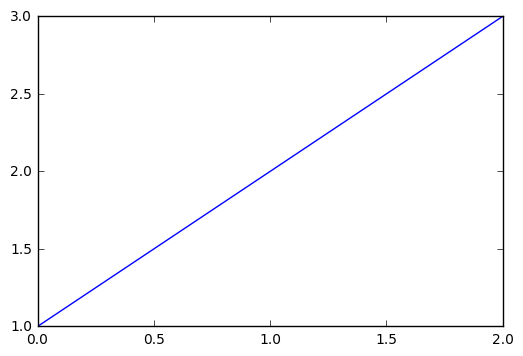

In [80]:
pd.Series([1, 2, 3]).plot()

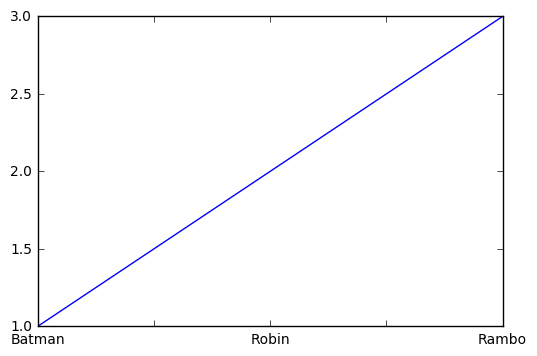

In [81]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot()

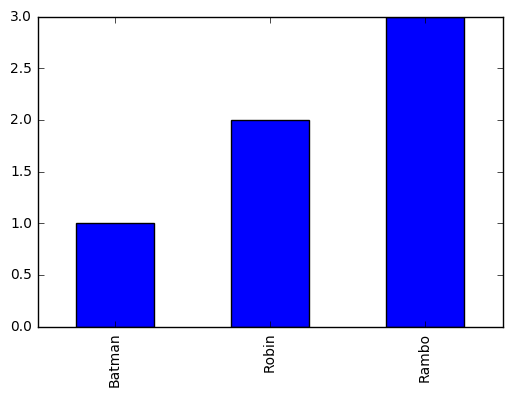

In [82]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='bar')

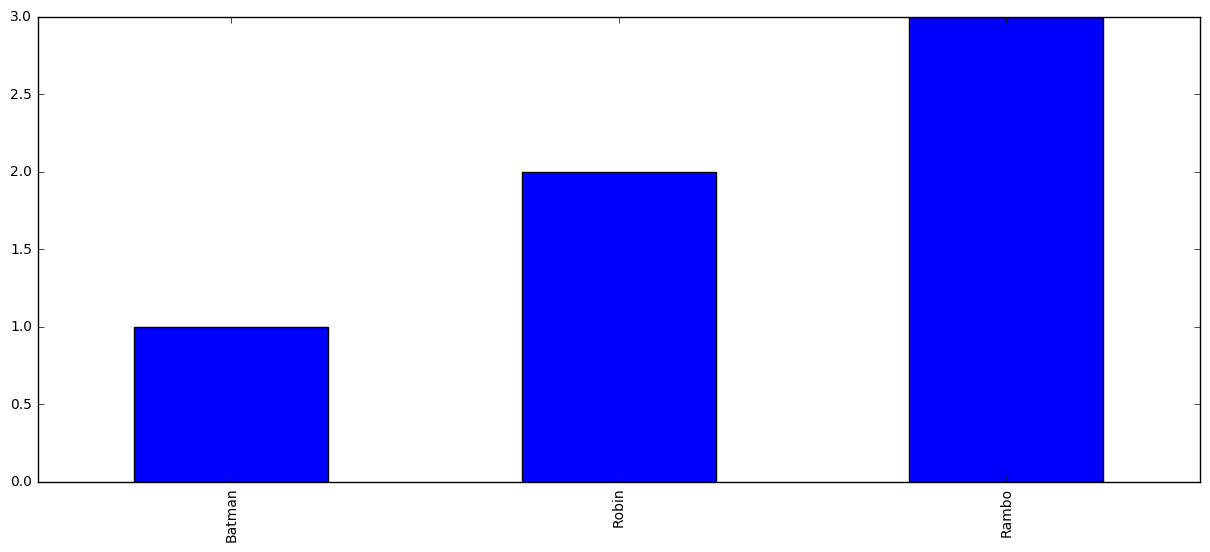

In [83]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(
    kind='bar',
    figsize=(15, 6)
)

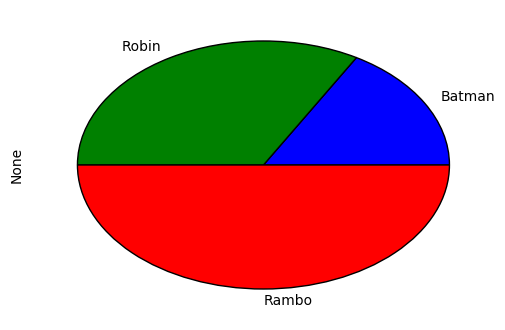

In [84]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='pie')

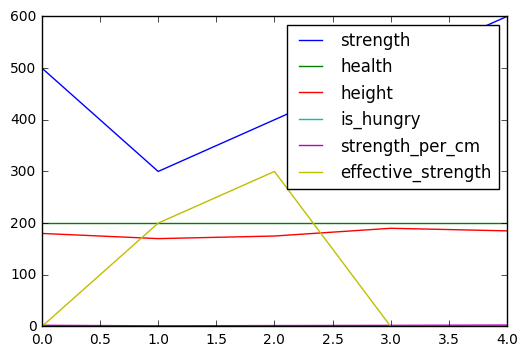

In [85]:
heroes.plot()

In [86]:
indexed_heroes = heroes.set_index('hero')
indexed_heroes

,strength,health,height,is_hungry,strength_per_cm,code,effective_strength
hero,,,,,,,
Batman,500,200,180,True,2.222222,Ba,0
Robin,300,200,170,False,1.176471,Ro,200
Spiderman,400,200,175,False,1.714286,Sp,300
Robocop,500,200,190,True,2.105263,Ro,0
Terminator,600,200,185,True,2.702703,Te,0


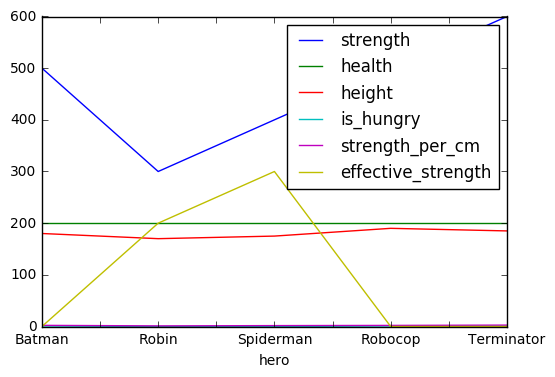

In [87]:
indexed_heroes.plot()

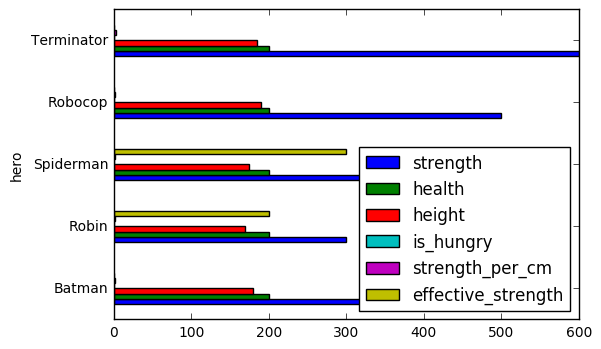

In [88]:
indexed_heroes.plot(kind='barh')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110cc2a50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1110b7510>], dtype=object)

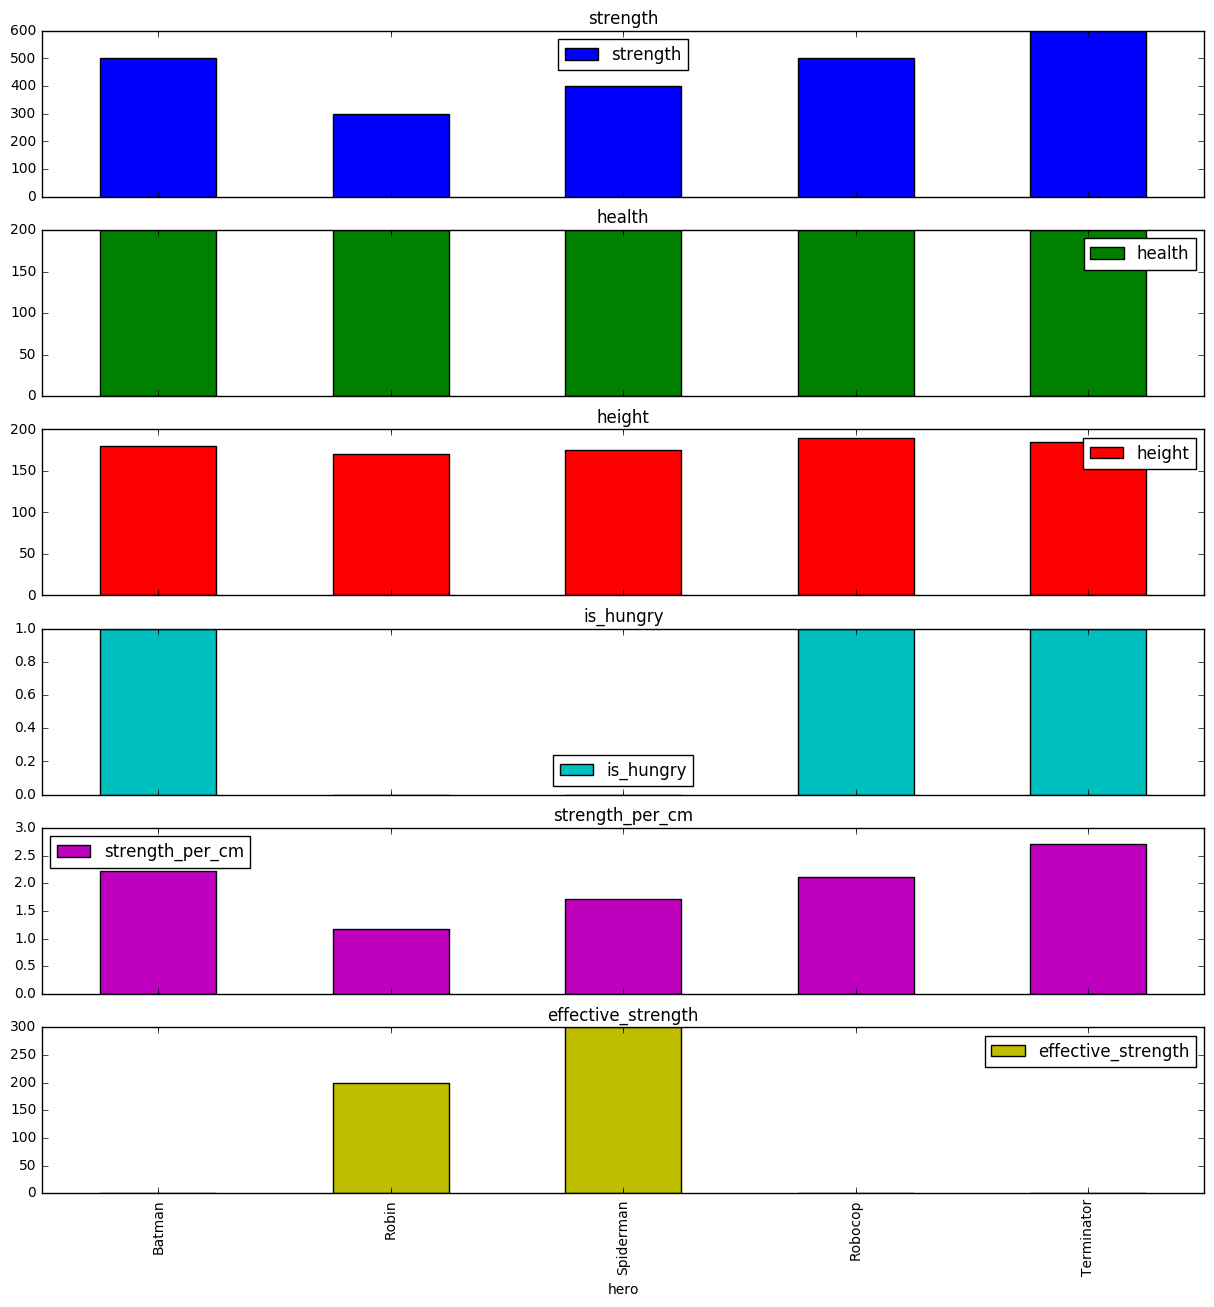

In [89]:
indexed_heroes.plot(kind='bar', subplots=True, figsize=(15, 15))

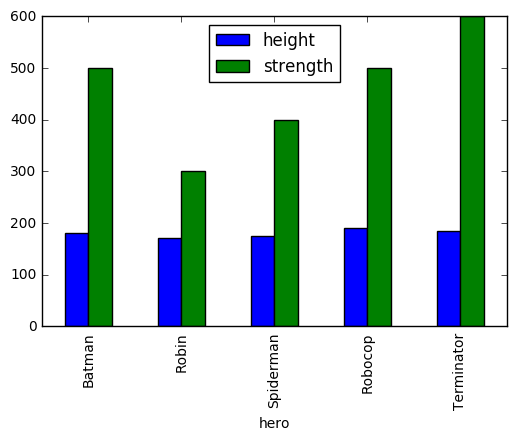

In [90]:
indexed_heroes[['height', 'strength']].plot(kind='bar')

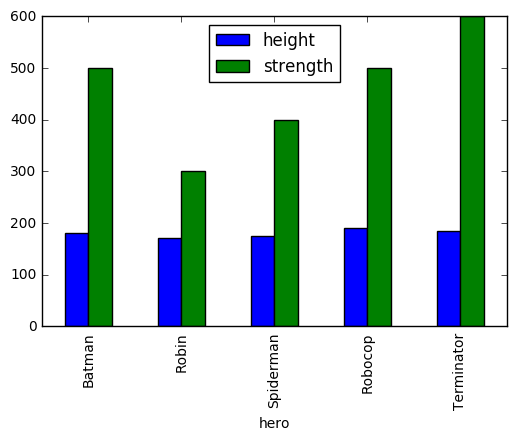

In [91]:
heroes.plot(x='hero', y=['height', 'strength'], kind='bar')

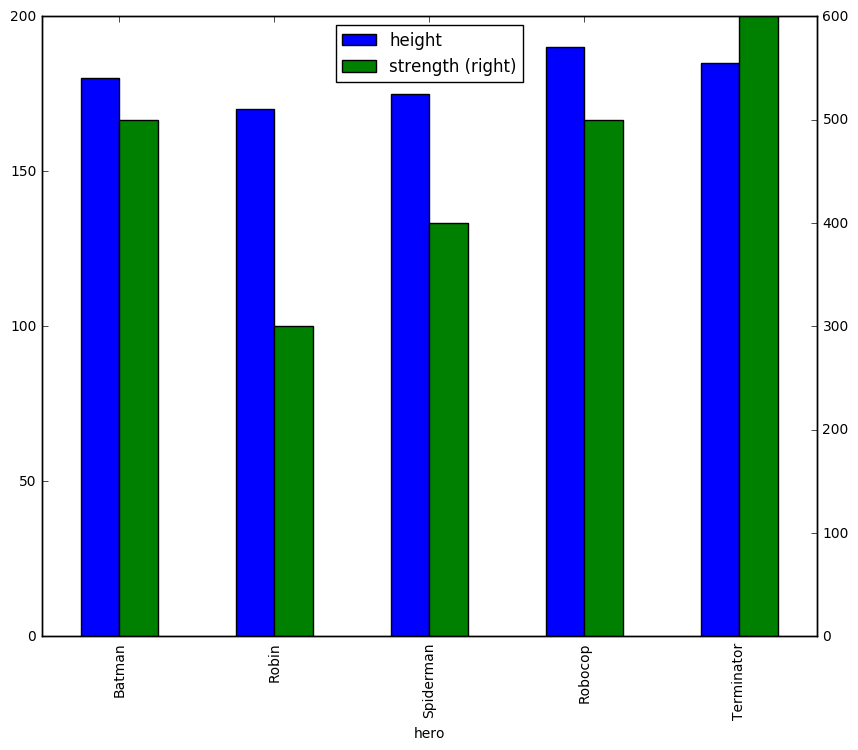

In [92]:
# alternative to subplots
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    figsize=(10,8)
)

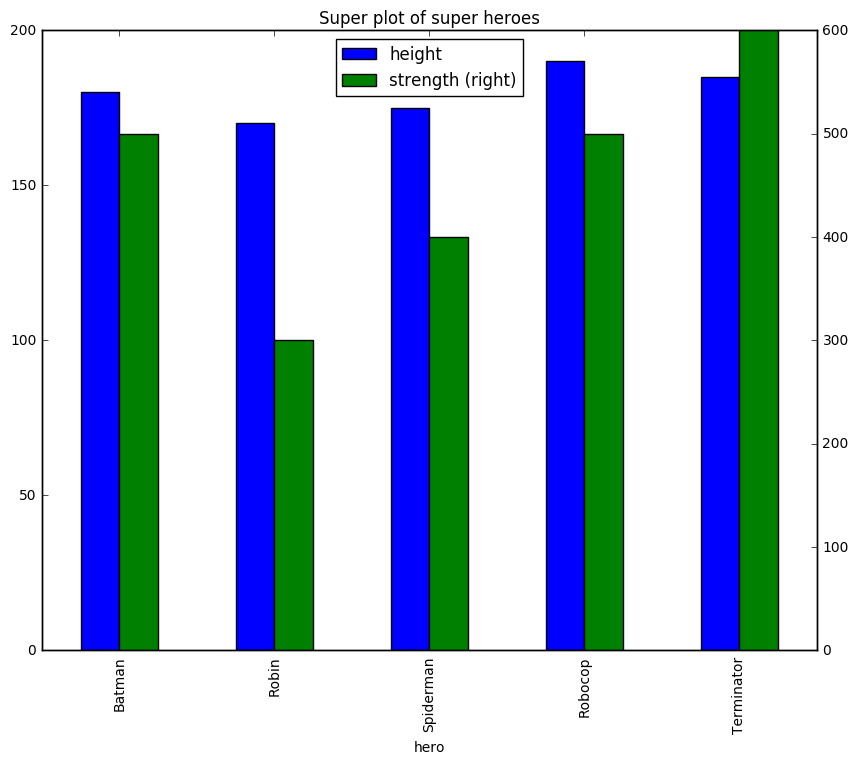

In [93]:
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    title='Super plot of super heroes',
    figsize=(10,8)
)

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125a4550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113077b90>]], dtype=object)

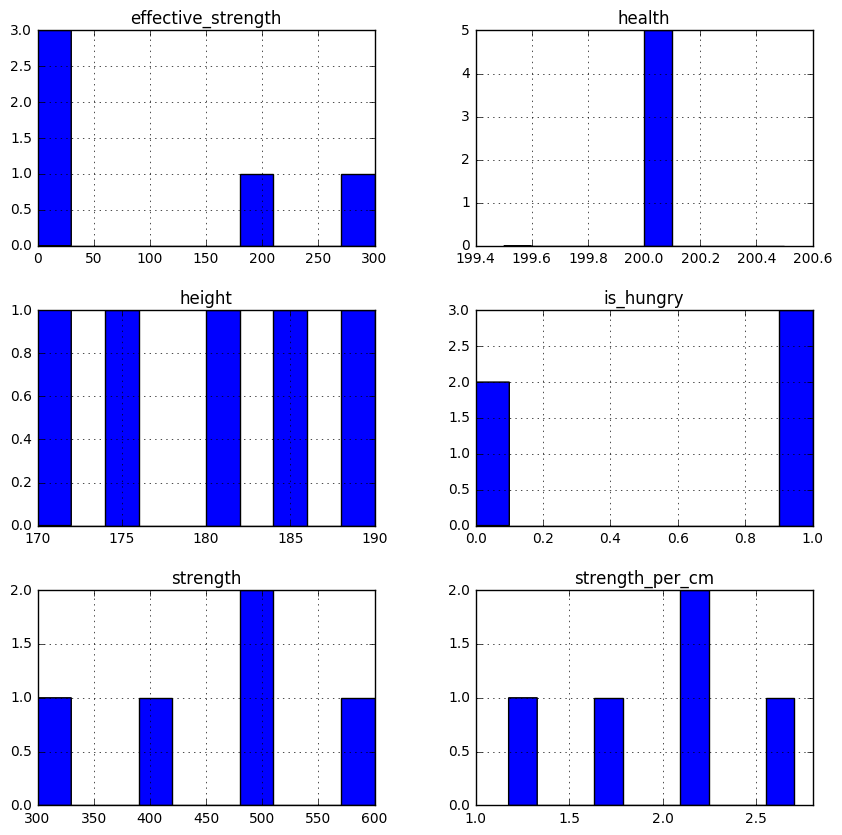

In [94]:
heroes.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113731610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1139a6f10>]], dtype=object)

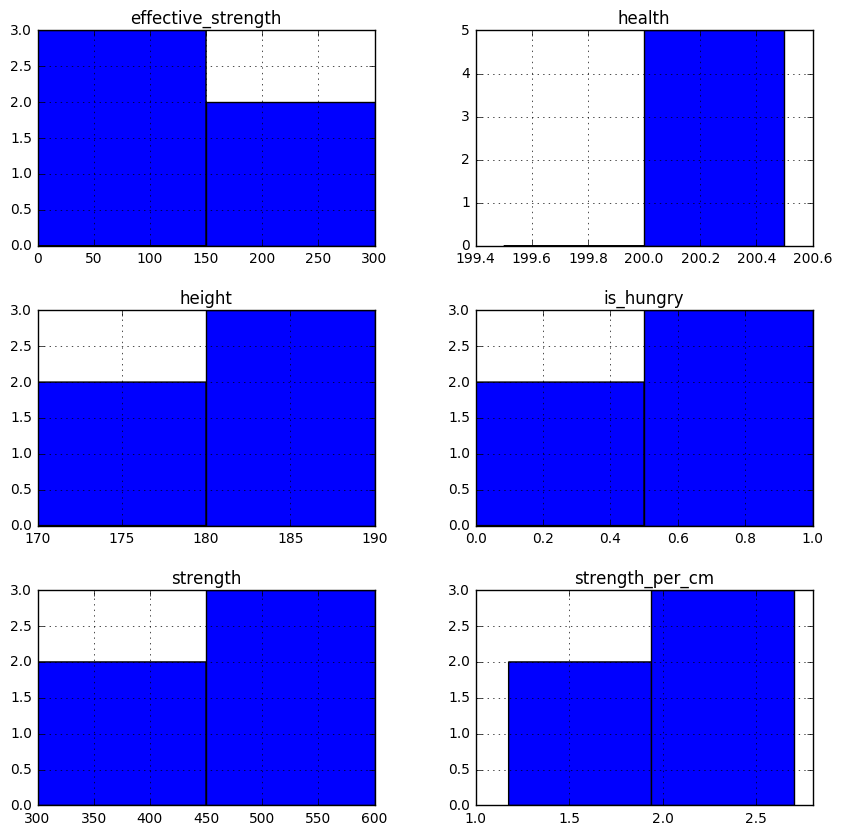

In [95]:
heroes.hist(
    figsize=(10, 10),
    bins=2
)

### DataFrames everywhere.. are easy to plot

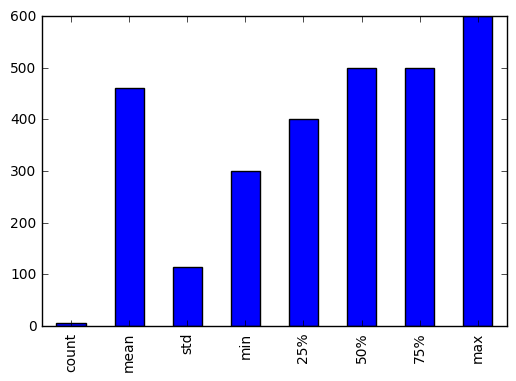

In [96]:
heroes.describe()['strength'].plot(kind='bar')

### EXERCISE

#### Create a chart presenting grosses of movies directed by Christopher Nolan

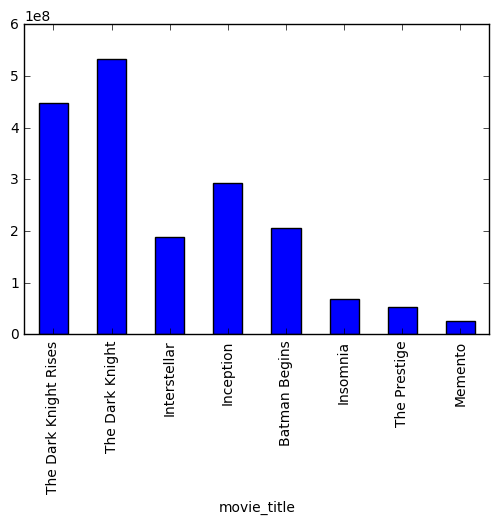

In [97]:
# Solution here

nolan_movies = movies[movies['director_name'] == 'Christopher Nolan']
nolan_movies = nolan_movies.set_index('movie_title')

nolan_movies['gross'].plot(kind='bar')

#### What are typical durations of the movies?

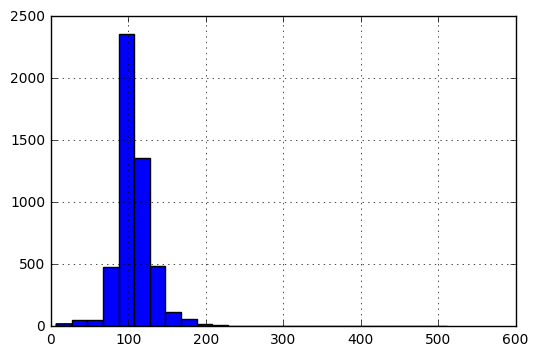

In [98]:
# Solution here

movies['duration'].hist(bins=25)

#### What is percentage distribution of first genre? (cake)

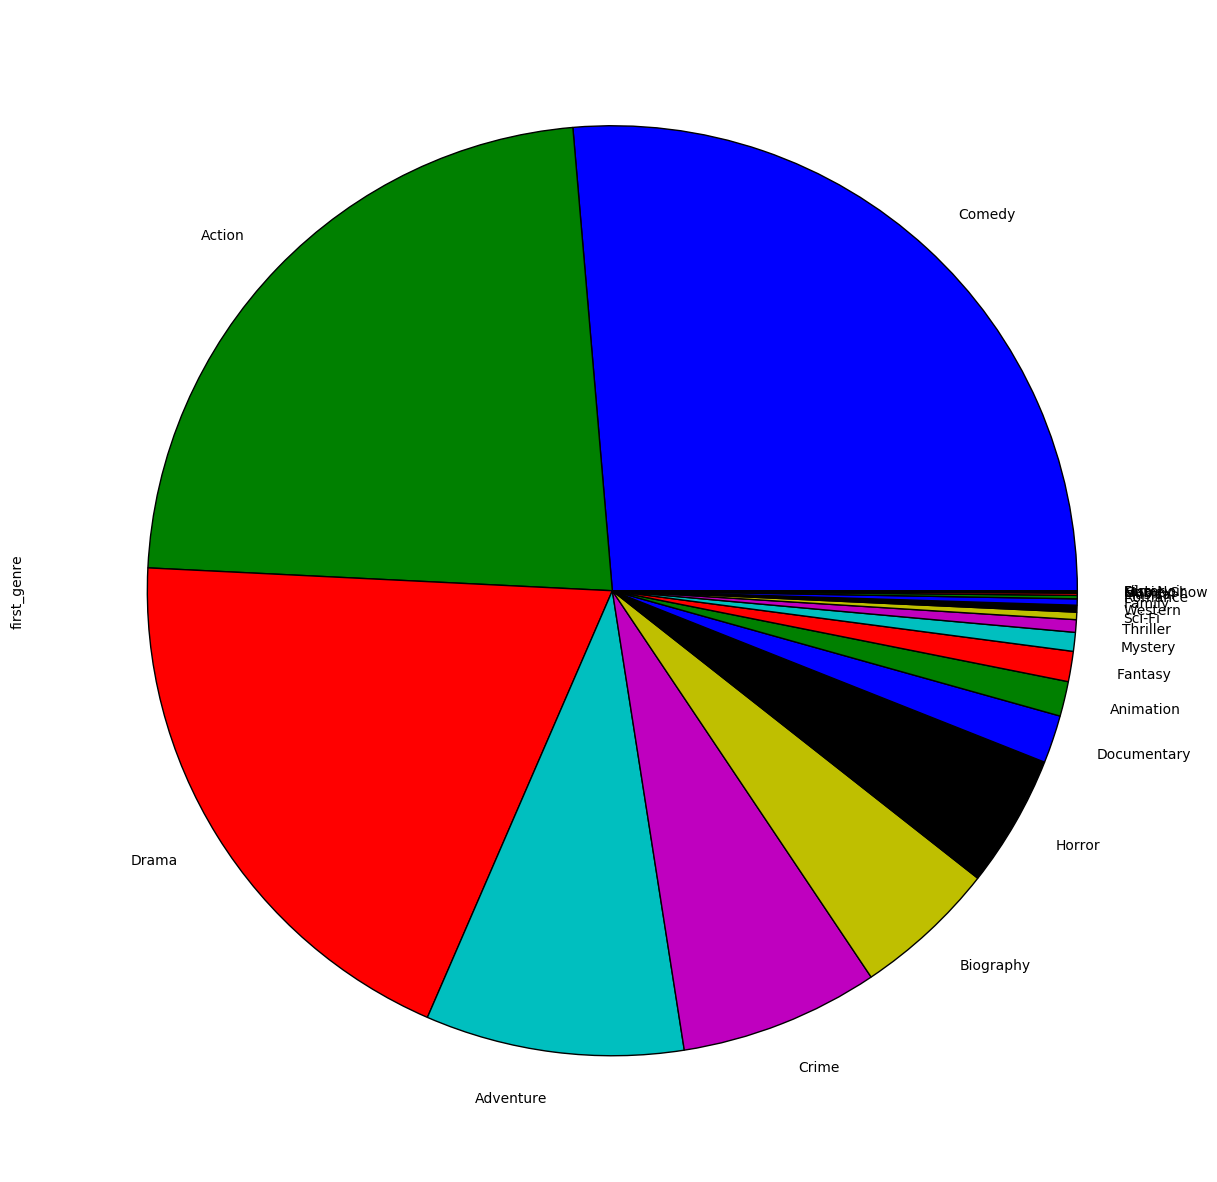

In [99]:
# Solution here

movies['first_genre'].value_counts().plot(
    kind='pie',
    figsize=(15,15)
)

## Aggregation

### Grouping

![caption](files/split-apply-combine.jpg)

> https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg

In [100]:
movie_heroes = pd.DataFrame({
    'hero': ['Batman', 'Robin', 'Spiderman', 'Robocop', 'Lex Luthor', 'Dr Octopus'],
    'movie': ['Batman', 'Batman', 'Spiderman', 'Robocop', 'Spiderman', 'Spiderman'],
    'strength': [400, 100, 400, 560, 89, 300],
    'speed': [100, 10, 200, 1, 20, None],
})
movie_heroes = movie_heroes.set_index('hero')
movie_heroes

,movie,speed,strength
hero,,,
Batman,Batman,100.0,400
Robin,Batman,10.0,100
Spiderman,Spiderman,200.0,400
Robocop,Robocop,1.0,560
Lex Luthor,Spiderman,20.0,89
Dr Octopus,Spiderman,NaN,300


In [101]:
movie_heroes.groupby('movie')

In [102]:
list(movie_heroes.groupby('movie'))

[('Batman',          movie  speed  strength
  hero                           
  Batman  Batman  100.0       400
  Robin   Batman   10.0       100),
 ('Robocop',            movie  speed  strength
  hero                             
  Robocop  Robocop    1.0       560),
 ('Spiderman',                 movie  speed  strength
  hero                                  
  Spiderman   Spiderman  200.0       400
  Lex Luthor  Spiderman   20.0        89
  Dr Octopus  Spiderman    NaN       300)]

### Aggregating

In [103]:
movie_heroes.groupby('movie').size()

movie
Batman       2
Robocop      1
Spiderman    3
dtype: int64

In [104]:
movie_heroes.groupby('movie').count()

,speed,strength
movie,,
Batman,2,2
Robocop,1,1
Spiderman,2,3


In [105]:
movie_heroes.groupby('movie')['speed'].sum()

movie
Batman       110.0
Robocop        1.0
Spiderman    220.0
Name: speed, dtype: float64

In [106]:
movie_heroes.groupby('movie').mean()

,speed,strength
movie,,
Batman,55.0,250
Robocop,1.0,560
Spiderman,110.0,263


In [107]:
movie_heroes.groupby('movie').apply(
    lambda group: group['strength'] / group['strength'].max()
)

movie      hero      
Batman     Batman        1.0000
           Robin         0.2500
Robocop    Robocop       1.0000
Spiderman  Spiderman     1.0000
           Lex Luthor    0.2225
           Dr Octopus    0.7500
Name: strength, dtype: float64

In [108]:
movie_heroes.groupby('movie').agg({
    'speed': 'mean',
    'strength': 'max',
})

,strength,speed
movie,,
Batman,400,55.0
Robocop,560,1.0
Spiderman,400,110.0


In [109]:
movie_heroes = movie_heroes.reset_index()
movie_heroes

,hero,movie,speed,strength
0,Batman,Batman,100.0,400
1,Robin,Batman,10.0,100
2,Spiderman,Spiderman,200.0,400
3,Robocop,Robocop,1.0,560
4,Lex Luthor,Spiderman,20.0,89
5,Dr Octopus,Spiderman,NaN,300


In [110]:
movie_heroes.groupby(['movie', 'hero']).mean()

speed  strength
movie     hero                       
Batman    Batman      100.0       400
          Robin        10.0       100
Robocop   Robocop       1.0       560
Spiderman Dr Octopus    NaN       300
          Lex Luthor   20.0        89
          Spiderman   200.0       400

### EXERCISE

#### What was maximal gross in each year?

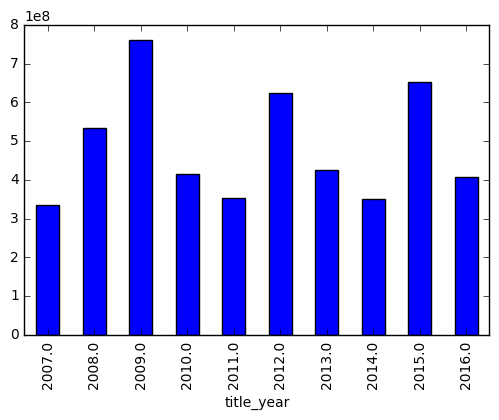

In [111]:
# Solution here

movies.groupby('title_year')['gross'].max().tail(10).plot(kind='bar')

#### Which director earns the most on average?

In [112]:
# Solution here

movies.groupby(
    'director_name'
)['gross'].mean()\
          .sort_values(ascending=False)\
          .head(3)

director_name
Joss Whedon    432721657.0
Lee Unkrich    414984497.0
Chris Buck     400736600.0
Name: gross, dtype: float64

# Index related operations

### Data alignment on Index

In [113]:
movie_heroes

,hero,movie,speed,strength
0,Batman,Batman,100.0,400
1,Robin,Batman,10.0,100
2,Spiderman,Spiderman,200.0,400
3,Robocop,Robocop,1.0,560
4,Lex Luthor,Spiderman,20.0,89
5,Dr Octopus,Spiderman,NaN,300


In [114]:
apetite = pd.DataFrame([
    dict(hero='Spiderman', is_hungry=True),
    dict(hero='Robocop', is_hungry=False)
])
apetite

,hero,is_hungry
0,Spiderman,True
1,Robocop,False


In [115]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100.0,400,True
1,Robin,Batman,10.0,100,False
2,Spiderman,Spiderman,200.0,400,NaN
3,Robocop,Robocop,1.0,560,NaN
4,Lex Luthor,Spiderman,20.0,89,NaN
5,Dr Octopus,Spiderman,NaN,300,NaN


In [116]:
apetite.index = [2, 3]

In [117]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100.0,400,NaN
1,Robin,Batman,10.0,100,NaN
2,Spiderman,Spiderman,200.0,400,True
3,Robocop,Robocop,1.0,560,False
4,Lex Luthor,Spiderman,20.0,89,NaN
5,Dr Octopus,Spiderman,NaN,300,NaN


### Setting index

In [118]:
indexed_movie_heroes = movie_heroes.set_index('hero')
indexed_movie_heroes

,movie,speed,strength,is_hungry
hero,,,,
Batman,Batman,100.0,400,NaN
Robin,Batman,10.0,100,NaN
Spiderman,Spiderman,200.0,400,True
Robocop,Robocop,1.0,560,False
Lex Luthor,Spiderman,20.0,89,NaN
Dr Octopus,Spiderman,NaN,300,NaN


In [119]:
indexed_apetite = apetite.set_index('hero')
indexed_apetite

,is_hungry
hero,
Spiderman,True
Robocop,False


In [120]:
# and alignment works well automagically..

indexed_movie_heroes['is_hungry'] = indexed_apetite['is_hungry']

In [121]:
indexed_movie_heroes

,movie,speed,strength,is_hungry
hero,,,,
Batman,Batman,100.0,400,NaN
Robin,Batman,10.0,100,NaN
Spiderman,Spiderman,200.0,400,True
Robocop,Robocop,1.0,560,False
Lex Luthor,Spiderman,20.0,89,NaN
Dr Octopus,Spiderman,NaN,300,NaN


### Merging two DFs (a'la SQL join)

In [122]:
movie_heroes

,hero,movie,speed,strength,is_hungry
0,Batman,Batman,100.0,400,NaN
1,Robin,Batman,10.0,100,NaN
2,Spiderman,Spiderman,200.0,400,True
3,Robocop,Robocop,1.0,560,False
4,Lex Luthor,Spiderman,20.0,89,NaN
5,Dr Octopus,Spiderman,NaN,300,NaN


In [123]:
apetite

,hero,is_hungry
2,Spiderman,True
3,Robocop,False


In [124]:
# couple of other arguments available here

pd.merge(
    movie_heroes[['hero', 'speed']],
    apetite,
    on=['hero'],
    how='outer'
)

,hero,speed,is_hungry
0,Batman,100.0,NaN
1,Robin,10.0,NaN
2,Spiderman,200.0,True
3,Robocop,1.0,False
4,Lex Luthor,20.0,NaN
5,Dr Octopus,NaN,NaN


### DateTime operations

In [125]:
spiderman_meals = pd.DataFrame([
        dict(time='2016-10-15 10:00', calories=300),
        dict(time='2016-10-15 13:00', calories=900),
        dict(time='2016-10-15 15:00', calories=1200),
        dict(time='2016-10-15 21:00', calories=700),
        dict(time='2016-10-16 07:00', calories=1600),
        dict(time='2016-10-16 13:00', calories=600),
        dict(time='2016-10-16 16:00', calories=900),
        dict(time='2016-10-16 20:00', calories=500),
        dict(time='2016-10-16 21:00', calories=300),
        dict(time='2016-10-17 08:00', calories=900),
    ])
spiderman_meals

,calories,time
0,300,2016-10-15 10:00
1,900,2016-10-15 13:00
2,1200,2016-10-15 15:00
3,700,2016-10-15 21:00
4,1600,2016-10-16 07:00
5,600,2016-10-16 13:00
6,900,2016-10-16 16:00
7,500,2016-10-16 20:00
8,300,2016-10-16 21:00
9,900,2016-10-17 08:00


In [126]:
spiderman_meals.dtypes

calories     int64
time        object
dtype: object

In [127]:
spiderman_meals['time'] = pd.to_datetime(spiderman_meals['time'])
spiderman_meals.dtypes

calories             int64
time        datetime64[ns]
dtype: object

In [128]:
spiderman_meals

,calories,time
0,300,2016-10-15 10:00:00
1,900,2016-10-15 13:00:00
2,1200,2016-10-15 15:00:00
3,700,2016-10-15 21:00:00
4,1600,2016-10-16 07:00:00
5,600,2016-10-16 13:00:00
6,900,2016-10-16 16:00:00
7,500,2016-10-16 20:00:00
8,300,2016-10-16 21:00:00
9,900,2016-10-17 08:00:00


In [129]:
spiderman_meals = spiderman_meals.set_index('time')
spiderman_meals

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700
2016-10-16 07:00:00,1600
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300


In [130]:
spiderman_meals.index

DatetimeIndex(['2016-10-15 10:00:00', '2016-10-15 13:00:00',
               '2016-10-15 15:00:00', '2016-10-15 21:00:00',
               '2016-10-16 07:00:00', '2016-10-16 13:00:00',
               '2016-10-16 16:00:00', '2016-10-16 20:00:00',
               '2016-10-16 21:00:00', '2016-10-17 08:00:00'],
              dtype='datetime64[ns]', name=u'time', freq=None)

#### Filtering

In [131]:
spiderman_meals["2016-10-15"]

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700


In [132]:
spiderman_meals["2016-10-16 10:00":]

,calories
time,
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300
2016-10-17 08:00:00,900


In [133]:
spiderman_meals["2016-10-16 10:00":"2016-10-16 20:00"]

,calories
time,
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500


In [134]:
spiderman_meals["2016-10"]

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 13:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 21:00:00,700
2016-10-16 07:00:00,1600
2016-10-16 13:00:00,600
2016-10-16 16:00:00,900
2016-10-16 20:00:00,500
2016-10-16 21:00:00,300


#### Reasmpling (downsampling and upsampling)

In [135]:
spiderman_meals.resample('1D').sum()

,calories
time,
2016-10-15,3100
2016-10-16,3900
2016-10-17,900


In [136]:
spiderman_meals.resample('1H').mean()

,calories
time,
2016-10-15 10:00:00,300.0
2016-10-15 11:00:00,NaN
2016-10-15 12:00:00,NaN
2016-10-15 13:00:00,900.0
2016-10-15 14:00:00,NaN
2016-10-15 15:00:00,1200.0
2016-10-15 16:00:00,NaN
2016-10-15 17:00:00,NaN
2016-10-15 18:00:00,NaN


In [137]:
spiderman_meals.resample('1H').ffill()

,calories
time,
2016-10-15 10:00:00,300
2016-10-15 11:00:00,300
2016-10-15 12:00:00,300
2016-10-15 13:00:00,900
2016-10-15 14:00:00,900
2016-10-15 15:00:00,1200
2016-10-15 16:00:00,1200
2016-10-15 17:00:00,1200
2016-10-15 18:00:00,1200


In [138]:
spiderman_meals.resample('1D').first()

,calories
time,
2016-10-15,300
2016-10-16,1600
2016-10-17,900


### EXERCISE

#### Read Star Wars: The Force Awakens's tweets from data/theforceawakens_tweets.csv. Create DateTimeIndex from created_at column.

In [139]:
# Solution here

force_awakens_tweets = pd.read_csv(
    'data/theforceawakens_tweets.csv',
    parse_dates=['created_at'],
    index_col='created_at'
)
force_awakens_tweets.head()

,tweet_id
created_at,
2016-09-21 20:02:48,778685932769730565
2016-09-21 20:04:26,778686345170477057
2016-09-21 20:05:11,778686534207713280
2016-09-21 20:08:19,778687322204233728
2016-09-21 20:08:55,778687471961767937


#### How many tweets did Star Wars: The Force Awakens have in each of last days?

In [140]:
# Solution here

force_awakens_tweets.resample('1D').count()

,tweet_id
created_at,
2016-09-21,153
2016-09-22,747
2016-09-23,1313
2016-09-24,898
2016-09-25,954
2016-09-26,791
2016-09-27,789
2016-09-28,695
2016-09-29,919


#### What were the most popular tweeting times of the day for that movie?

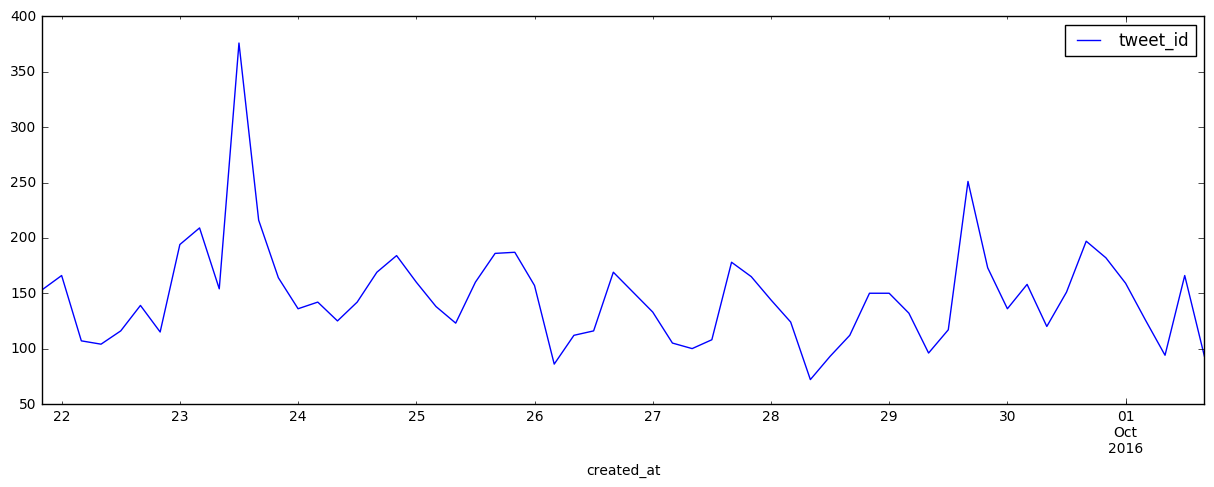

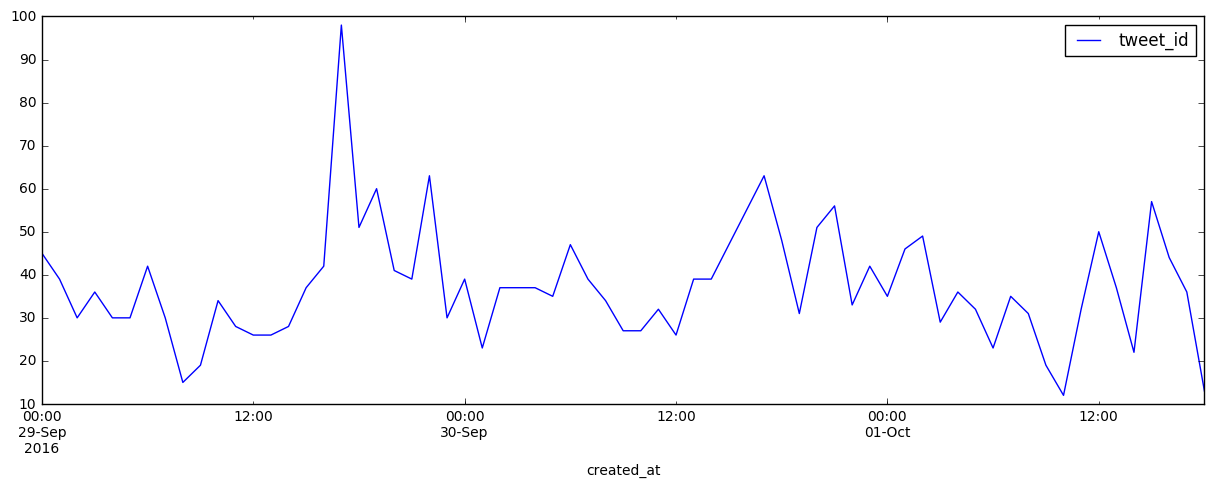

In [141]:
# Solution here

force_awakens_tweets.resample('4H').count() \
    .plot(figsize=(15, 5))
    
force_awakens_tweets["2016-09-29":].resample('1H').count() \
    .plot(figsize=(15,5))

## Advanced topics + Advanced exercises

### Filling missing data

In [142]:
heroes_with_missing = pd.DataFrame([
        ('Batman', None, None),
        ('Robin', None, 100),
        ('Spiderman', 400, 90),
        ('Robocop', 500, 95),
        ('Terminator', 600, None)
    ], columns=['hero', 'strength', 'health'])
heroes_with_missing

,hero,strength,health
0,Batman,NaN,NaN
1,Robin,NaN,100.0
2,Spiderman,400.0,90.0
3,Robocop,500.0,95.0
4,Terminator,600.0,NaN


In [143]:
heroes_with_missing.dropna()

,hero,strength,health
2,Spiderman,400.0,90.0
3,Robocop,500.0,95.0


In [144]:
heroes_with_missing.fillna(0)

,hero,strength,health
0,Batman,0.0,0.0
1,Robin,0.0,100.0
2,Spiderman,400.0,90.0
3,Robocop,500.0,95.0
4,Terminator,600.0,0.0


In [145]:
heroes_with_missing.fillna(heroes_with_missing.min())

,hero,strength,health
0,Batman,400.0,90.0
1,Robin,400.0,100.0
2,Spiderman,400.0,90.0
3,Robocop,500.0,95.0
4,Terminator,600.0,90.0


In [146]:
heroes_with_missing.fillna(heroes_with_missing.median())

,hero,strength,health
0,Batman,500.0,95.0
1,Robin,500.0,100.0
2,Spiderman,400.0,90.0
3,Robocop,500.0,95.0
4,Terminator,600.0,95.0


### Scikit-learn

It can handle both Python objects and numpy arrays

In [147]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X=[
        [1],
        [2]
    ],
    y=[
        10,
        20
    ])

/Users/jacekrzeszutek/.virtualenvs/first-steps-with-pandas/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
clf.predict([[3], [100], [1000]])

array([   30.,  1000., 10000.])

In [149]:
X = np.array([1, 2])[:,np.newaxis]
y = np.array([10, 20])

X

array([[1],
       [2]])

In [150]:
clf.fit(X, y)
clf.predict( np.array([3, 100, 1000])[:,np.newaxis] )

array([   30.,  1000., 10000.])

More models to try: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### EXERCISE

#### Integration with scikit-learn: Create a model that tries to predict gross of movie. Use any features of the movies dataset.

In [151]:
# Solution here

from sklearn.linear_model import LinearRegression

FEATURES = ['num_voted_users', 'imdb_score']
TARGET = 'gross'

movies_with_data = movies[FEATURES + [TARGET]].dropna()

X = movies_with_data[FEATURES].values
y = movies_with_data[TARGET].values

clf = LinearRegression()
clf.fit(X, y)

clf.predict([
    [800000, 8.0],
    [400000, 8.0],
    [400000, 4.0],
    [ 40000, 8.0],
])

array([  2.62239503e+08,   1.33963329e+08,   1.64074385e+08,
         1.85147715e+07])

#### Create a method discovering movies with plot keywords similar to the given list of keywords (i.e. `['magic', 'harry', 'wizard']`)

In [152]:
# Solution here

def discover_similar_plot(target_keywords, threshold=0.5):
    movies_with_plot = movies.dropna(
        subset=['plot_keywords']
    ).copy()
    
    movies_with_plot['plot_keywords_set'] = movies_with_plot[
        'plot_keywords'
    ].str.split('|').map(set)
    
    movies_with_plot['match_count'] = movies_with_plot[
        'plot_keywords_set'
    ].map(
        lambda keywords: len(keywords.intersection(target_keywords))
    )
    
    return movies_with_plot[
        (movies_with_plot['match_count'] >= threshold*len(target_keywords))
    ]

discover_similar_plot(['magic', 'harry', 'wizard'])['movie_title']

114    Harry Potter and the Order of the Phoenix
115          Harry Potter and the Goblet of Fire
195     Harry Potter and the Prisoner of Azkaban
Name: movie_title, dtype: object

#### Integration with Flask
In the file flask_exercise.py you'll find the scaffolding for Flask app.<br/>Create endpoints returning:
  - all movie titles available in the movies dataset
  - 10 worst rated movies ever
  - 10 best rated (imdb_score) movies in a given year

In [153]:
# Solution in flask_exercise.py

## Thank you for your effort! We hope that you enjoyed the journey!

### Any questions?
### Any feedback?

You can reach us:
- rzeszutekjacek at the most popular service gmail.com
- mateuszflieger at as you would expect gmail.com

![caption](files/panda_shooting_rainbow.jpg)

> http://66.media.tumblr.com/b0e67112232adb68180fe7b988304abd/tumblr_inline_nw063rleWO1tp3b6e_1280.jpg